## K Means

In [61]:
import pandas as pd
kmdt = pd.read_csv('numeric_clustering_data.csv')
kmdt.head()

,Age,duration,Min_balance,spend_per_month
0,56,261,42058,24994
1,23,148,1580,22171
2,37,226,64919,6094
3,37,135,1151,15646
4,56,307,42359,26907


In [62]:
print(kmdt.shape)
kmdt.describe()

(41188, 4)


,Age,duration,Min_balance,spend_per_month
count,41188.000000,41188.000000,41188.000000,41188.000000
mean,36.477882,172.750097,28390.154001,22757.040279
std,9.609824,204.509468,27249.444855,10722.434996
min,17.000000,0.000000,0.000000,5004.000000
25%,30.000000,70.000000,1973.750000,14954.750000
50%,35.000000,114.000000,3977.000000,20250.000000
75%,42.000000,180.000000,55019.000000,27364.250000
max,98.000000,4918.000000,69998.000000,49996.000000


In [63]:
X=kmdt.iloc[:, [0,1,2,3]].values
X

array([[   56,   261, 42058, 24994],
       [   23,   148,  1580, 22171],
       [   37,   226, 64919,  6094],
       ...,
       [   56,   189, 57980, 17719],
       [   42,    80,  1022, 13332],
       [   36,   107,  2895, 19852]], dtype=int64)

In [64]:
from sklearn.cluster import KMeans

## Find out number clusters exist in the data
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

In [65]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

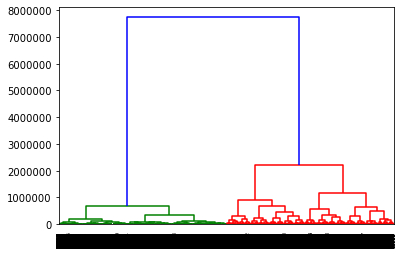

In [66]:
linkage_data = linkage(kmdt, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

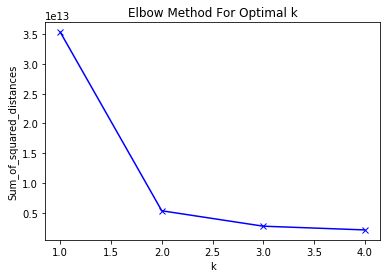

In [67]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Find out number clusters exist in the data
Sum_of_squared_distances = []
K = range(1,5)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [68]:
model = KMeans(n_clusters=2, random_state=42) 
dt_kmeans = model.fit(X)

In [69]:
dt_kmeans.labels_
kmdt['cluster_labels'] = dt_kmeans.labels_
kmdt.head()

,Age,duration,Min_balance,spend_per_month,cluster_labels
0,56,261,42058,24994,0
1,23,148,1580,22171,1
2,37,226,64919,6094,0
3,37,135,1151,15646,1
4,56,307,42359,26907,0


In [70]:
## Silhoute coefficient for clusters

score = silhouette_score(X, model.labels_, metric='euclidean')

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.774


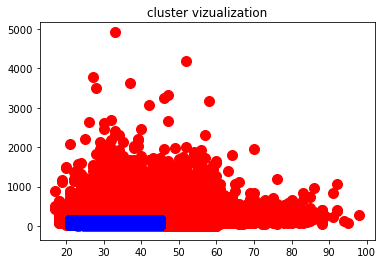

In [71]:
# Plot the cluster

plt.title("cluster vizualization")

y_kmeans = model.fit_predict(X)

plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')

In [72]:
# Deep dive into clusters

print(kmdt.groupby('cluster_labels').describe().unstack(1))

                        cluster_labels
Age              count  0                 20475.000000
                        1                 20713.000000
                 mean   0                    39.977680
                        1                    33.018298
                 std    0                    10.429463
                                              ...     
spend_per_month  50%    1                 18005.000000
                 75%    0                 38875.500000
                        1                 21460.000000
                 max    0                 49996.000000
                        1                 25000.000000
Length: 64, dtype: float64


In [73]:
## Write output in csv
kmdt.to_csv('kmeans_output.csv')

## Kmeans ++

In [74]:
kmdt.head()

## Drop the cluster labels by Kmeans

,Age,duration,Min_balance,spend_per_month,cluster_labels
0,56,261,42058,24994,0
1,23,148,1580,22171,1
2,37,226,64919,6094,0
3,37,135,1151,15646,1
4,56,307,42359,26907,0


In [75]:
kmeans = KMeans(n_clusters=2, init ='k-means++',  n_init=10,random_state=0 )

y_kmeans = kmeans.fit_predict(X)

from sklearn.metrics import silhouette_score

score = silhouette_score(X, kmeans.labels_, metric='euclidean')

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.774


Silhouetter Score: 0.774


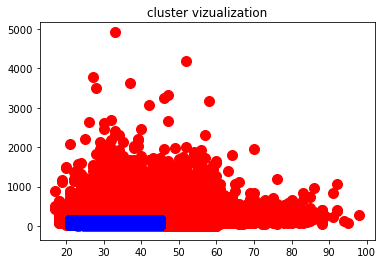

In [76]:
## Plot the clusters

y_kmeans = kmeans.fit_predict(X)
y_kmeans

from sklearn.metrics import silhouette_score

score = silhouette_score(X, kmeans.labels_, metric='euclidean')

print('Silhouetter Score: %.3f' % score)


plt.title("cluster vizualization")

plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')

In [78]:
## Deep dive into clusters

kmdt['kmeans_plus_pred'] = y_kmeans
print(kmdt.groupby('kmeans_plus_pred').describe().unstack(1))

                       kmeans_plus_pred
Age             count  0                   20475.000000
                       1                   20713.000000
                mean   0                      39.977680
                       1                      33.018298
                std    0                      10.429463
                                               ...     
cluster_labels  50%    1                       1.000000
                75%    0                       0.000000
                       1                       1.000000
                max    0                       0.000000
                       1                       1.000000
Length: 80, dtype: float64


## Kmodes

In [2]:
from kmodes.kmodes import KModes
import pandas as pd
data = pd.read_csv('kmod.csv')
data.head()

,job,marital,education,housing,loan
0,housemaid,married,basic.4y,no,no
1,services,married,high.school,no,no
2,services,married,high.school,yes,no
3,admin.,married,basic.6y,no,no
4,services,married,high.school,no,yes


In [3]:
print(data.shape)
data.describe()

(38245, 5)


,job,marital,education,housing,loan
count,38245,38245,38245,38245,38245
unique,11,3,7,2,2
top,admin.,married,university.degree,yes,no
freq,9937,23183,11821,20578,32286


In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank_cust = data.apply(le.fit_transform)
bank_cust.head()

,job,marital,education,housing,loan
0,3,1,0,0,0
1,7,1,3,0,0
2,7,1,3,1,0
3,0,1,1,0,0
4,7,1,3,0,1


In [ ]:
For kmod two types of initializations methods are there 'cao' and 'huang'

In [9]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(bank_cust)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 93420.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 76658.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 69931.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 64835.0


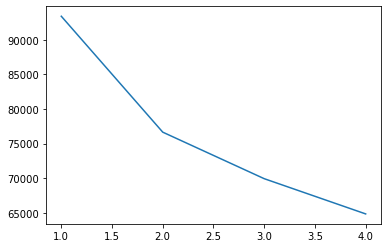

In [12]:
import numpy as np
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [13]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 76658.0


In [16]:
cost_huang = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 1, verbose=1)
    kmode.fit_predict(bank_cust)
    cost_huang.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 93420.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 11013, cost: 74472.0
Run 1, iteration: 2/100, moves: 3751, cost: 74472.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7417, cost: 75659.0
Run 1, iteration: 2/100, moves: 1882, cost: 75659.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8185, cost: 66174.0
Run 1, iteration: 2/100, moves: 2375, cost: 66174.0


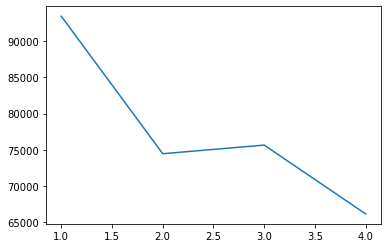

In [17]:
import numpy as np
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost_huang)

In [18]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)
fitClusters_cao

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 76658.0


array([0, 1, 0, ..., 0, 0, 0], dtype=uint16)

In [19]:
km_huang = KModes(n_clusters=3, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(bank_cust)
fitClusters_huang

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7891, cost: 70476.0


array([1, 1, 1, ..., 0, 2, 2], dtype=uint16)

In [20]:
bank_cust['fitClusters_huang'] = fitClusters_huang
bank_cust['fitClusters_cao'] = fitClusters_cao
bank_cust.head()

,job,marital,education,housing,loan,fitClusters_huang,fitClusters_cao
0,3,1,0,0,0,1,0
1,7,1,3,0,0,1,1
2,7,1,3,1,0,1,0
3,0,1,1,0,0,0,0
4,7,1,3,0,1,1,1


In [23]:
X = bank_cust.iloc[:, [0,1,2,3,4]].values

array([[3, 1, 0, 0, 0],
       [7, 1, 3, 0, 0],
       [7, 1, 3, 1, 0],
       ...,
       [5, 1, 6, 1, 0],
       [9, 1, 5, 0, 0],
       [5, 1, 5, 1, 0]])

In [25]:
from sklearn.metrics import silhouette_score
print(f'Silhouette Score(n=2): {silhouette_score(X, fitClusters_cao)}')

Silhouette Score(n=2): 0.03452979602968806


In [26]:
print(f'Silhouette Score(n=3): {silhouette_score(X, fitClusters_huang)}')

Silhouette Score(n=3): 0.10778934418784657


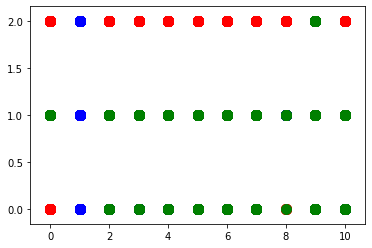

In [30]:
import matplotlib.pyplot as plt
plt.scatter(X[fitClusters_huang==0, 0], X[fitClusters_huang==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[fitClusters_huang==1, 0], X[fitClusters_huang==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[fitClusters_huang==2, 0], X[fitClusters_huang==2, 1], s=100, c='green', label ='Cluster 3')

In [40]:
km_huang_two = KModes(n_clusters=3, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang_two = km_huang_two.fit_predict(bank_cust)
fitClusters_huang_two
print(f'Silhouette Score(n=3): {silhouette_score(X, fitClusters_huang_two)}')

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8417, cost: 74113.0
Silhouette Score(n=3): 0.1017550614515525


In [38]:
bank_cust['fitClusters_huang_two'] = fitClusters_huang_two
bank_cust.drop (['fitClusters_huang','fitClusters_cao'],axis = 1,inplace=True)
bank_cust.to_csv('clustering_labels.csv')

## DBSCAN 

In [80]:
dbscan_input_data = pd.read_csv('dbscan_input_data.csv')
dbscan_input_data.head()

,Cust_ID,Age,duration,Min_balance,spend_per_month,job,marital,education
0,1001,56,261,42058,24994,housemaid,married,basic.4y
1,1002,23,148,1580,22171,services,married,high.school
2,1003,37,226,64919,6094,services,married,high.school
3,1004,37,135,1151,15646,admin.,married,basic.6y
4,1005,56,307,42359,26907,services,married,high.school


In [86]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank_cust = dbscan_input_data[['job','marital','education']].apply(le.fit_transform)

numeric_data = dbscan_input_data[['Age','duration','Min_balance','spend_per_month']]
final_data = pd.concat([numeric_data,bank_cust],axis =1)
final_data.head()

,Age,duration,Min_balance,spend_per_month,job,marital,education
0,56,261,42058,24994,3,1,0
1,23,148,1580,22171,7,1,3
2,37,226,64919,6094,7,1,3
3,37,135,1151,15646,0,1,1
4,56,307,42359,26907,7,1,3


In [90]:
from sklearn.preprocessing import StandardScaler
X = final_data.iloc[:, [0,1,2,3,4,5,6]].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [92]:
from sklearn.preprocessing import normalize
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)
X_normalized.head()

,0,1,2,3,4,5,6
0,0.733686,0.153273,0.177755,0.074109,-0.065434,-0.099343,-0.622071
1,-0.702191,-0.060261,-0.491445,-0.027501,0.469216,-0.138940,-0.146814
2,0.026982,0.112430,0.579581,-0.673333,0.407984,-0.120808,-0.127655
3,0.030355,-0.089852,-0.488397,-0.323420,-0.500894,-0.135909,-0.615229
4,0.831757,0.264381,0.205976,0.156053,0.380339,-0.112622,-0.119005


In [95]:
from sklearn.cluster import DBSCAN

# eps: Two points are considered neighbors if the distance between the two points is below the threshold epsilon.
# min_samples: The minimum number of neighbors a given point should have in order to be classified as a core point.

db_default = DBSCAN(eps = 0.3, min_samples = 3).fit(X_normalized)
labels = db_default.labels_
labels

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

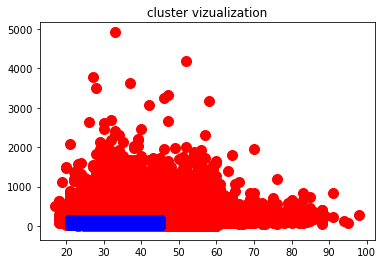

In [96]:
plt.title("cluster vizualization")

plt.scatter(X[labels==0, 0], X[labels==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=100, c='blue', label ='Cluster 2')

In [97]:
dbscan_input_data['dbscan_labels'] = labels
dbscan_input_data.head()

,Cust_ID,Age,duration,Min_balance,spend_per_month,job,marital,education,dbscan_labels
0,1001,56,261,42058,24994,housemaid,married,basic.4y,0
1,1002,23,148,1580,22171,services,married,high.school,1
2,1003,37,226,64919,6094,services,married,high.school,0
3,1004,37,135,1151,15646,admin.,married,basic.6y,1
4,1005,56,307,42359,26907,services,married,high.school,0


In [98]:
dbscan_input_data.to_csv('dbscan_cluster_output.csv')